In [ ]:
import glob
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


#Load PPI, illumina 27 annotations and genes with highest variance

In [ ]:
import pickle
with open('/content/drive/MyDrive/BioInfo/cols_var_5000.pkl', 'rb') as file:
    cols = pickle.load(file)
cols

array(['ENSG00000274618.2', 'ENSG00000169474.4', 'ENSG00000169469.9', ...,
       'ENSG00000162843.17', 'ENSG00000205517.13', 'ENSG00000184166.2'],
      dtype=object)

In [ ]:
links_meth = pd.read_csv('/content/drive/MyDrive/lung/methylation_gene_connections.csv')
links_meth

,gene_name,Name,gene_id
0,A1BG,cg22568540,ENSG00000121410.12
1,A2M,cg12058490,ENSG00000175899.15
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
4,A4GALT,cg07393322,ENSG00000128274.17
...,...,...,...
21429,ZYX,cg03100196,ENSG00000159840.16
21430,ZZEF1,cg05922057,ENSG00000074755.15
21431,ZZEF1,cg07607921,ENSG00000074755.15
21432,ZZZ3,cg04127303,ENSG00000036549.13


In [ ]:
links_meth = links_meth[links_meth['gene_id'].isin(cols)]
links_meth

,gene_name,Name,gene_id
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
6,A4GNT,cg17687282,ENSG00000118017.4
7,A4GNT,cg18931888,ENSG00000118017.4
12,AADAC,cg05564657,ENSG00000114771.14
...,...,...,...
21411,ZPBP2,cg14914852,ENSG00000186075.13
21412,ZPLD1,cg01913908,ENSG00000170044.8
21414,ZSCAN1,cg07942995,ENSG00000152467.10
21415,ZSCAN1,cg21331821,ENSG00000152467.10


In [ ]:
cols_meth = set(links_meth['Name'].values)
len(cols_meth)

4891

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/lung/link_index_5000.csv').drop('Unnamed: 0', axis=1)
links

,index1,index
0,336,629
1,513,629
2,1901,629
3,184,629
4,1546,629
...,...,...
868841,1081,3947
868842,4297,3947
868843,4532,3947
868844,2672,3947


In [ ]:
set_index = list(set(links['index']))

In [ ]:
edge_index = np.array([links['index'], links['index1']])
edge_index.shape

(2, 868846)

In [ ]:
!pip install python-louvain

In [ ]:
edges = list(zip(edge_index[0], edge_index[1]))

#LOAD Methylation Data and Gene Expression for A-Priori Integration

In [ ]:
df_tumor = pd.read_csv('/content/drive/MyDrive/lung/gene_tumor_id.csv').drop('tumor', axis=1).set_index('Unnamed: 0')
df_tumor

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
56c07b06-c6d3-4c03-9e57-7be636e7cc5c,3.788268,-4.522841,4.805256,1.686568,1.453122,-7.117787,6.766263,6.020651,4.095865,3.855023,...,-9.965784,-9.965784,-9.965784,-3.807932,-9.965784,-9.965784,-9.965784,-9.965784,-5.947862,-3.146883
56c07b06-c6d3-4c03-9e57-7be636e7cc5c,3.788268,-4.522841,4.805256,1.686568,1.453122,-7.117787,6.766263,6.020651,4.095865,3.855023,...,-9.965784,-9.965784,-9.965784,-3.807932,-9.965784,-9.965784,-9.965784,-9.965784,-5.947862,-3.146883
d55de89b-c5bd-4901-9de9-fecaae0f9cfd,2.181484,-4.161008,4.855975,2.478713,2.192131,3.157254,4.504678,3.640760,2.756511,3.691300,...,-9.965784,-9.965784,-6.983932,-3.066125,-9.965784,-9.965784,-9.965784,-9.965784,-3.551310,-2.946750
c6e1b9d8-09c8-4e05-ba87-ca985db813e3,2.665597,-3.919206,5.227475,2.104504,1.946581,1.256648,5.753695,4.115757,2.279382,3.770332,...,-9.965784,-9.965784,-5.680382,-9.965784,-9.965784,-9.965784,-6.254289,-9.965784,-6.506353,-2.533660
217bbeb4-6b93-47d9-808f-14fd17e9b3b4,3.017031,-5.601212,5.491651,1.857105,2.140419,1.563744,3.254972,1.675680,5.394151,3.709688,...,-9.965784,-9.965784,-5.429731,-1.469130,-9.965784,-9.965784,-9.965784,-9.965784,-5.965784,-3.042160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54af5967-283d-4dd0-90e0-d2c351694c4c,3.770597,-2.173319,4.490936,2.278788,1.112433,2.027119,5.878245,3.761955,2.547351,4.282314,...,-9.965784,-9.965784,-6.733124,-4.477141,-9.965784,-9.965784,-9.965784,-9.965784,-5.339345,-2.870915
570d34b4-1b20-4124-9086-5e4f678ad64d,4.026313,-1.634419,4.790881,2.692182,2.458986,1.614851,4.915473,4.063425,3.479399,4.577181,...,-9.965784,-9.965784,-5.695255,-0.556818,-4.895395,-9.965784,-9.965784,-9.965784,-5.030325,-2.678534
5d9f9c9d-2188-4106-b75b-6add5e560855,2.657663,-2.890038,4.552463,1.853317,1.302641,2.381422,5.619891,3.490442,2.980391,3.898779,...,-9.965784,-9.965784,-5.243318,-1.681307,-3.448509,-9.965784,-9.965784,-9.965784,-5.539520,-1.860400


In [ ]:
df_meth_tumor = pd.read_csv('/content/drive/MyDrive/lung/meth_tumor_id.csv').drop('tumor', axis=1).set_index('Unnamed: 0')
df_meth_tumor

,cg02932167,cg23594876,cg11903096,cg13842648,cg01505590,cg00571634,cg18611281,cg24682149,cg03383661,cg27560864,...,cg21846488,cg18794577,cg06059810,cg15952487,cg21301148,cg14303674,cg16837769,cg24217726,cg06394897,cg05358404
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
56c07b06-c6d3-4c03-9e57-7be636e7cc5c,0.837288,0.046871,0.081712,0.461749,0.015053,0.044319,0.119393,0.069918,0.064286,0.319976,...,0.571640,0.042933,0.880821,0.227056,0.203054,NaN,0.027856,0.929990,NaN,0.692485
56c07b06-c6d3-4c03-9e57-7be636e7cc5c,0.906502,0.033266,0.062061,0.529717,0.012732,0.040466,0.113311,0.070466,0.068304,0.420652,...,0.472376,0.032852,0.889434,0.059717,0.095326,0.766781,0.021747,0.934113,NaN,0.686041
d55de89b-c5bd-4901-9de9-fecaae0f9cfd,0.626647,0.057083,0.052108,0.462933,0.013114,0.047103,0.079947,0.080009,0.066904,0.343533,...,0.437849,0.214133,0.931682,0.568111,0.313224,0.536870,0.030420,0.944846,NaN,0.637081
c6e1b9d8-09c8-4e05-ba87-ca985db813e3,0.775840,0.049144,0.042735,0.526428,0.010891,0.038711,0.047245,0.051898,0.054296,0.565719,...,0.581426,0.026804,0.749117,0.557031,0.260284,0.694623,0.034649,0.937814,NaN,0.654207
217bbeb4-6b93-47d9-808f-14fd17e9b3b4,0.734258,0.039724,0.052968,0.744504,0.015894,0.037222,0.148537,0.073689,0.064726,0.333631,...,0.637343,0.033501,0.848108,0.517427,0.424802,0.366125,0.030665,0.917408,NaN,0.705675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54af5967-283d-4dd0-90e0-d2c351694c4c,0.529446,0.038834,0.057724,0.393793,0.012164,0.041384,0.063126,0.079525,0.067876,0.433770,...,0.323323,0.060434,0.890379,0.429536,0.240575,NaN,0.030379,0.911825,NaN,0.761498
570d34b4-1b20-4124-9086-5e4f678ad64d,0.657467,0.038391,0.053877,0.739595,0.018473,0.047011,0.098292,0.074264,0.082431,0.505654,...,0.212189,0.077722,0.904043,0.282490,0.134611,0.641344,0.038581,0.942086,NaN,0.835342
5d9f9c9d-2188-4106-b75b-6add5e560855,0.742539,0.046385,0.037669,0.631300,0.012132,0.033185,0.061682,0.065815,0.056262,0.401196,...,0.669181,0.381238,0.839367,0.581529,0.308806,0.455742,0.029296,0.937663,NaN,0.705104


In [ ]:
cols_tumor = set(df_meth_tumor.columns.values)
cols_res = cols_meth.intersection(cols_tumor)

In [ ]:
df_meth_tumor = df_meth_tumor.loc[:, cols_res]
df_meth_tumor

<ipython-input-14-f7ac35164605>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_meth_tumor = df_meth_tumor.loc[:, cols_res]


,cg16016036,cg20126106,cg03543593,cg01424107,cg06459378,cg00247489,cg04592706,cg06141025,cg03086857,cg16249711,...,cg20625138,cg07830847,cg18468467,cg05820087,cg19685066,cg14606768,cg26232558,cg00725635,cg04456238,cg02115041
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
56c07b06-c6d3-4c03-9e57-7be636e7cc5c,0.582022,0.146450,NaN,0.085503,0.885090,0.041048,0.930210,NaN,0.166501,0.918153,...,0.723005,0.916186,0.071920,0.473519,0.648877,0.917432,NaN,0.189201,0.416750,0.163846
56c07b06-c6d3-4c03-9e57-7be636e7cc5c,0.707259,0.143644,0.079790,0.044041,0.736424,0.038414,0.933034,NaN,0.487097,0.949186,...,0.851401,0.770462,0.053583,0.416698,0.440051,0.909822,0.299584,0.092198,0.629706,0.205007
d55de89b-c5bd-4901-9de9-fecaae0f9cfd,0.735128,0.158207,0.399438,0.122225,0.943474,0.057386,0.935832,NaN,0.226641,0.874649,...,0.553187,0.811421,0.101556,0.693455,0.647430,0.801646,0.869370,0.219802,0.540515,0.115371
c6e1b9d8-09c8-4e05-ba87-ca985db813e3,0.954407,0.078843,0.273648,0.047028,0.917694,0.024886,0.938791,NaN,0.099153,0.843402,...,0.807408,0.919503,0.061669,0.449945,0.809578,0.906368,0.891887,0.068859,0.559700,0.263512
217bbeb4-6b93-47d9-808f-14fd17e9b3b4,0.950310,0.166454,0.401502,0.342987,0.933769,0.032648,0.916069,NaN,0.128731,0.903562,...,0.790081,0.933854,0.053949,0.506285,0.878918,0.885916,0.873505,0.201754,0.779191,0.074188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54af5967-283d-4dd0-90e0-d2c351694c4c,0.733078,0.158334,0.494293,0.224494,0.931866,0.026290,0.911334,NaN,0.225333,0.891178,...,0.654723,0.677387,0.044502,0.626893,0.571852,0.846741,NaN,0.123852,0.394486,0.236911
570d34b4-1b20-4124-9086-5e4f678ad64d,0.602312,0.359321,0.864829,0.145336,0.877597,0.042912,0.951533,NaN,0.103491,0.888306,...,0.440091,0.629390,0.077322,0.296187,0.429251,0.336180,0.693752,0.086418,0.639396,0.319872
5d9f9c9d-2188-4106-b75b-6add5e560855,0.888245,0.109265,0.353967,0.043562,0.957445,0.039453,0.954982,NaN,0.172868,0.864719,...,0.640579,0.956912,0.069021,0.620142,0.735937,0.886851,0.911849,0.080714,0.716939,0.300979


In [ ]:
df_normal = pd.read_csv('/content/drive/MyDrive/lung/gene_normal_id.csv').drop('tumor', axis=1).set_index('Unnamed: 0')
df_normal

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
46098b0b-a53e-425a-abc0-73561c447ea1,2.428223,-3.140507,4.262568,1.889084,0.499068,4.875859,4.259340,3.876281,2.043659,2.866117,...,-9.965784,-9.965784,-4.775960,-5.107803,-9.965784,-9.965784,-9.965784,-9.965784,-4.816037,-3.326263
028061ef-a99c-42dd-b011-344036e5357f,2.859652,-1.739854,4.444866,1.687105,0.488104,4.576722,5.056237,3.440514,2.177439,3.164143,...,-9.965784,-9.965784,-9.965784,-4.714065,-9.965784,-9.965784,-9.965784,-9.965784,-5.221623,-3.111539
5d990ed9-53e4-49c5-aeea-ae2ef30128ec,2.046770,-2.275088,4.317970,1.900529,0.312665,4.969408,5.611408,3.562047,1.530171,3.291957,...,-9.965784,-9.965784,-7.058894,-5.795859,-4.803897,-9.965784,-7.097888,-9.965784,-4.371833,-4.030325
a2a050e0-23b8-45ae-888e-010874616996,3.174406,-1.356975,4.367133,2.234256,0.719753,3.863968,4.840509,3.275096,2.558855,2.982072,...,-9.965784,-9.965784,-6.965784,-3.740818,-3.712173,-9.965784,-9.965784,-9.965784,-4.259806,-2.929061
2f791c81-1325-4d3d-aa2f-fb07e80a71b3,2.499195,-3.037414,4.125444,1.652372,0.125519,4.729178,4.678371,3.630207,2.050153,2.850479,...,-9.965784,-9.965784,-9.965784,-3.168771,-9.965784,-9.965784,-5.974829,-9.965784,-3.795859,-3.222970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4ba11f85-5f18-4db9-af0f-c0da0b78f500,1.931418,-2.155213,4.359352,1.594453,0.812786,4.800677,5.684678,3.738843,1.458382,3.267026,...,-9.965784,-9.965784,-6.587273,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-6.333516,-3.501443
538c7894-e20a-4369-a076-fac566779894,3.193188,-1.337521,4.490679,2.168514,0.735522,4.334940,5.000261,3.153676,2.440022,3.232308,...,-9.965784,-9.965784,-5.345198,-5.526161,-4.532825,-9.965784,-9.965784,-9.965784,-5.886833,-3.756331
530b32cc-06f7-4a32-bc01-086f9447f9b0,2.604427,-1.190997,4.093864,1.808962,0.153546,4.727479,4.779801,3.209796,1.801779,3.260553,...,-9.965784,-9.965784,-5.339345,-3.408129,-4.532825,-9.965784,-9.965784,-9.965784,-6.179188,-3.754383


In [ ]:
df_meth_normal = pd.read_csv('/content/drive/MyDrive/lung/meth_normal_id.csv').drop('tumor', axis=1).set_index('Unnamed: 0')
df_meth_normal

,cg24499411,cg01050433,cg15195412,cg00616135,cg02547439,cg03469082,cg16007628,cg03231024,cg15705469,cg03328804,...,cg21184495,cg03270167,cg01422136,cg22062239,cg05511752,cg07039113,cg02956093,cg04819539,cg05863612,cg01837574
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
46098b0b-a53e-425a-abc0-73561c447ea1,0.723179,0.055187,0.226328,0.425131,0.048940,0.105522,0.052308,0.072315,0.037979,0.132515,...,0.070181,0.195271,NaN,0.044274,0.050310,0.872874,0.087458,0.927197,0.928514,0.366223
028061ef-a99c-42dd-b011-344036e5357f,0.831239,NaN,0.677376,0.847075,NaN,NaN,NaN,0.346222,0.063730,NaN,...,NaN,0.424517,NaN,NaN,NaN,0.866168,NaN,0.879923,0.698598,0.805365
5d990ed9-53e4-49c5-aeea-ae2ef30128ec,0.751209,0.084713,0.340114,0.525213,0.057883,0.152850,0.056379,0.082196,0.029669,0.130935,...,0.047473,0.150961,NaN,0.046789,0.056862,0.784414,0.099160,0.950257,0.926784,0.406172
a2a050e0-23b8-45ae-888e-010874616996,0.763430,0.110886,0.240634,0.429514,0.064461,0.116867,0.097244,0.066380,0.036419,0.149418,...,0.058349,0.278216,NaN,0.047657,0.061689,0.866339,0.092332,0.944480,0.930388,0.364639
2f791c81-1325-4d3d-aa2f-fb07e80a71b3,0.647552,0.067187,0.281731,0.489314,0.053463,0.127102,0.054755,0.069904,0.031921,0.115911,...,0.042106,0.187335,NaN,0.058542,0.050279,0.785350,0.120934,0.954078,0.927885,0.454263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4ba11f85-5f18-4db9-af0f-c0da0b78f500,0.816210,0.097921,0.368268,0.536518,0.054664,0.137491,0.059337,0.083474,0.038351,0.117707,...,0.074031,0.165786,NaN,0.059637,0.043837,0.863659,0.119402,0.954242,0.874609,0.432255
538c7894-e20a-4369-a076-fac566779894,0.791740,0.108262,0.244384,0.456644,0.039548,0.108124,0.046813,0.055129,0.033524,0.120410,...,0.049736,0.222074,NaN,0.046320,0.514479,0.866088,0.089767,0.948484,0.939764,0.394710
530b32cc-06f7-4a32-bc01-086f9447f9b0,0.643731,0.072327,0.273438,0.466185,0.039660,0.156642,0.070658,0.075260,0.030100,0.074864,...,0.055344,0.223222,NaN,0.059931,0.319514,0.829677,0.098522,0.956989,0.930702,0.322612


In [ ]:
cols_norm = set(df_meth_normal.columns.values)
cols_res = cols_meth.intersection(cols_norm)

In [ ]:
df_meth_normal = df_meth_normal.loc[:, cols_res]
df_meth_normal

<ipython-input-18-acb70fe2c922>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_meth_normal = df_meth_normal.loc[:, cols_res]


,cg16016036,cg20126106,cg03543593,cg01424107,cg06459378,cg00247489,cg04592706,cg06141025,cg03086857,cg16249711,...,cg20625138,cg07830847,cg18468467,cg05820087,cg19685066,cg14606768,cg26232558,cg00725635,cg04456238,cg02115041
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
46098b0b-a53e-425a-abc0-73561c447ea1,0.892237,0.120321,0.379977,0.078441,0.950628,0.050531,0.948312,NaN,0.127936,0.843350,...,0.688220,0.961425,0.066229,0.661995,0.896686,0.887474,0.928389,0.064208,0.297533,0.060114
028061ef-a99c-42dd-b011-344036e5357f,0.889670,NaN,NaN,NaN,0.789999,NaN,0.786465,NaN,NaN,0.913773,...,0.784618,0.864543,NaN,0.757388,0.887822,0.776505,0.605709,NaN,0.752876,NaN
5d990ed9-53e4-49c5-aeea-ae2ef30128ec,0.892174,0.142857,0.346255,0.115453,0.942503,0.032833,0.951925,NaN,0.157046,0.858940,...,0.705107,0.955808,0.060916,0.652046,0.876542,0.904292,0.940581,0.159319,0.454546,0.061540
a2a050e0-23b8-45ae-888e-010874616996,0.897963,0.136979,0.276397,0.072544,0.951040,0.050563,0.940595,NaN,0.114353,0.865489,...,0.621479,0.956494,0.102259,0.653154,0.881136,0.886496,0.929126,0.097074,0.269866,0.088393
2f791c81-1325-4d3d-aa2f-fb07e80a71b3,0.872440,0.175392,0.349083,0.103141,0.943372,0.048979,0.942121,NaN,0.141966,0.850273,...,0.637523,0.951527,0.065697,0.556265,0.865873,0.870453,0.918841,0.166669,0.345867,0.077170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4ba11f85-5f18-4db9-af0f-c0da0b78f500,0.900380,0.144083,0.388375,0.103612,0.957701,0.047584,0.953558,NaN,0.200082,0.853107,...,0.697043,0.956469,0.056683,0.731513,0.894222,0.900632,0.945416,0.114691,0.415002,0.079407
538c7894-e20a-4369-a076-fac566779894,0.898259,0.091695,0.253389,0.077130,0.950593,0.051815,0.951881,NaN,0.189529,0.856542,...,0.637717,0.957616,0.049507,0.656014,0.889969,0.885040,0.919447,0.075071,0.316340,0.060924
530b32cc-06f7-4a32-bc01-086f9447f9b0,0.914893,0.149698,0.398754,0.132758,0.934313,0.046208,0.949338,NaN,0.115951,0.817327,...,0.655638,0.958395,0.039532,0.651249,0.818536,0.870446,0.936961,0.112835,0.370574,0.057292


In [ ]:
df_normal = df_normal.loc[:, cols]
df_tumor = df_tumor.loc[:, cols]

#Load Gene Expression and Methylation Data combined with the learned method

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BioInfo/Louvain_combined/df_combined_network.csv')
df_normal = df[df['tumor'] == 0]
df_tumor = df[df['tumor'] == 1]

#Combination meth and genes -> A-Priori Deterministic Design Integration

In [ ]:
df_tumor = df_tumor.drop('tumor', axis=1)
df_normal = df_normal.drop('tumor', axis=1)

In [ ]:
df_norm = df_normal

In [ ]:
cols_normal = set(df_meth_normal.columns.values)
for g in df_normal.columns.values:
  if g in links_meth['gene_id'].values:
    meth = links_meth[links_meth['gene_id'] == g]['Name'].values
    c = list(set(meth).intersection(cols_normal))
    mean = df_meth_normal.loc[:, c].mean(axis=1, skipna=True).fillna(value=1)
    df_norm.loc[:, g] = df_norm.loc[:, g] * (1 + (1 - mean))

In [ ]:
df_tum = df_tumor

In [ ]:
cols_tumor = set(df_meth_tumor.columns.values)
for g in df_tumor.columns.values:
  if g in links_meth['gene_id'].values:
    meth = links_meth[links_meth['gene_id'] == g]['Name'].values
    c = list(set(meth).intersection(cols_tumor))
    mean = df_meth_tumor.loc[:, c].mean(axis=1, skipna=True).fillna(value=1)
    df_tum.loc[:, g] = df_tum.loc[:, g] * (1 + (1 - mean))

In [ ]:
df_tum.to_csv('/content/drive/MyDrive/BioInfo/Louvain_combined/df_tumor.csv', index=False)
df_norm.to_csv('/content/drive/MyDrive/BioInfo/Louvain_combined/df_normal.csv', index=False)

#Louvain with edges that consider correlation, application of WGCNA

In [ ]:
power = 6
tens = np.ones((df_norm.shape[1], df_norm.shape[1])) * 10
corr_normal = 0.5 + 0.5 * np.corrcoef(df_norm.transpose())
corr_normal = np.power(tens, np.nan_to_num(corr_normal ** power))
corr_tumor = 0.5 + 0.5 * np.corrcoef(df_tum.transpose())
corr_tumor = np.power(tens, np.nan_to_num(corr_tumor ** power))
print(corr_normal.shape)
print(corr_tumor.shape)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(5000, 5000)
(5000, 5000)


In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Assuming you have a list of edges for both tumor and normal cases with corresponding weights
tumor_edges = [(gene1, gene2, corr_tumor[gene1, gene2]) for gene1, gene2 in edges]# if gene1 < 19202 and gene2 < 19202]
normal_edges = [(gene1, gene2, corr_normal[gene1, gene2]) for gene1, gene2 in edges]# if gene1 < 19202 and gene2 < 19202]

# Create separate graphs for tumor and normal cases
G_tumor = nx.Graph()
G_normal = nx.Graph()

# Add weighted edges to the graphs
G_tumor.add_weighted_edges_from(tumor_edges)
G_normal.add_weighted_edges_from(normal_edges)

# Get communities for tumor and normal cases
communities_tumor = list(greedy_modularity_communities(G_tumor, weight='weight'))
communities_normal = list(greedy_modularity_communities(G_normal, weight='weight'))

In [ ]:
import pickle
#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/ct_corr_test2_mean.pkl', 'wb') as file:
    #pickle.dump(communities_tumor, file)

In [ ]:
#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/cn_corr_test2_mean.pkl', 'wb') as file:
    #pickle.dump(communities_normal, file)

In [ ]:
len(communities_tumor)

4

In [ ]:
len(communities_normal)

5

In [ ]:
comm_n = dict()

for i, c in enumerate(communities_normal):
  comm_n[i] = set(c)
  print(i, len(comm_n[i]))

#comm_n

0 2126
1 1326
2 1281
3 44
4 2


In [ ]:
comm_t = dict()

for i, c in enumerate(communities_tumor):
  comm_t[i] = set(c)
  print(i, len(comm_t[i]))

#comm_t

0 1877
1 1618
2 1281
3 3


In [ ]:
for i in range(len(comm_t.keys())):
  print(i)
  print("Comm. ",i," normal: ", len(comm_n[i]))
  print("Comm. ",i," tumor: ", len(comm_t[i]))
  print("Common: ", len(comm_n[i].intersection(comm_t[i])))

0
Comm.  0  normal:  2126
Comm.  0  tumor:  1877
Common:  786
1
Comm.  1  normal:  1326
Comm.  1  tumor:  1618
Common:  922
2
Comm.  2  normal:  1281
Comm.  2  tumor:  1281
Common:  277
3
Comm.  3  normal:  44
Comm.  3  tumor:  3
Common:  0


In [ ]:
changes = []
for i in range(0, 4):
  changes.extend(list(comm_n[i].difference(comm_t[i])))
  changes.extend(list(comm_t[i].difference(comm_n[i])))
for i in range(4, 5):
  changes.extend(list(comm_n[i]))

changes = list(set(changes))
len(changes)

2794

In [ ]:
cols = df.iloc[:, changes].columns.values
cols

array(['ENSG00000000005.6', 'ENSG00000003096.14', 'ENSG00000004799.8',
       ..., 'ENSG00000288631.1', 'ENSG00000288637.1', 'ENSG00000288656.1'],
      dtype=object)

In [ ]:
#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/cols_change_louvain_test_network.pkl', 'wb') as file:
    #pickle.dump(cols, file)

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  if g in cols:
    print(g)

ENSG00000171094.18


In [ ]:
most_expressed = pd.read_csv('/content/drive/MyDrive/lung/most_expressed.csv')
least_expressed = pd.read_csv('/content/drive/MyDrive/lung/least_expressed.csv')

In [ ]:
i = 0
for g in cols:
  if g in most_expressed['gene_name'].values:
    i += 1
print(i)

488


In [ ]:
common = []
for i in range(0, 9):
  common.extend(list(comm_n[i].intersection(comm_t[i])))
common = list(set(common))
len(common)

16519

In [ ]:
cols = df_normal.iloc[:, common].columns.values
cols

array(['ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13',
       ..., 'ENSG00000288631.1', 'ENSG00000288642.1', 'ENSG00000288649.1'],
      dtype=object)

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  if g in cols:
    print(g)

ENSG00000146648.19
ENSG00000133703.13
ENSG00000105976.16
ENSG00000157764.14
ENSG00000121879.6
ENSG00000171094.18
ENSG00000165731.20
ENSG00000047936.11
ENSG00000141510.18


In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  for comm in comm_t.keys():
    if g in df_normal.iloc[:, list(comm_t[comm])].columns.values:
      print(comm, g)

0 ENSG00000146648.19
1 ENSG00000133703.13
0 ENSG00000105976.16
0 ENSG00000157764.14
0 ENSG00000121879.6
0 ENSG00000171094.18
0 ENSG00000165731.20
0 ENSG00000047936.11
1 ENSG00000141510.18


#Genes in communities

<Axes: >

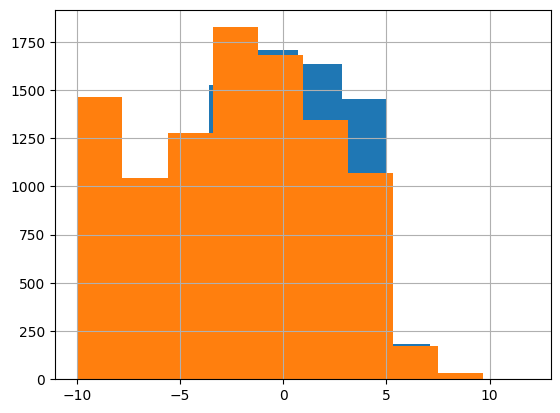

In [ ]:
df_normal.iloc[:, list(comm_n[0])].mean().hist()
df_tumor.iloc[:, list(comm_t[0])].mean().hist()

<Axes: >

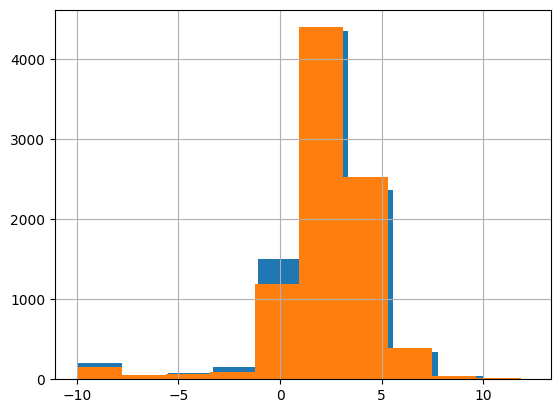

In [ ]:
df_normal.iloc[:, list(comm_n[1])].mean().hist()
df_tumor.iloc[:, list(comm_t[1])].mean().hist()

<Axes: >

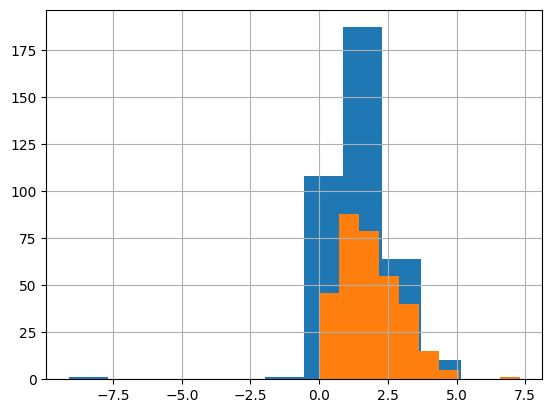

In [ ]:
df_normal.iloc[:, list(comm_n[2])].mean().hist()
df_tumor.iloc[:, list(comm_t[2])].mean().hist()

#Genes in common

<Axes: >

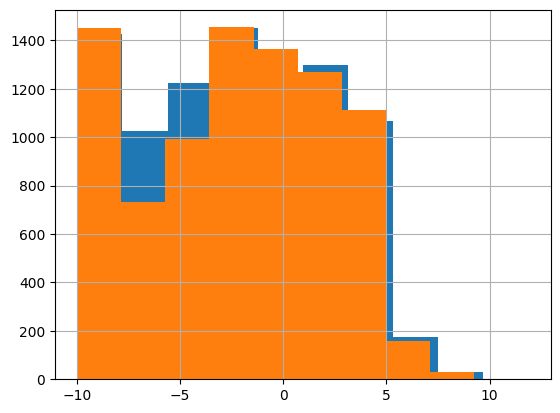

In [ ]:
df_tumor.iloc[:, list(comm_n[0].intersection(comm_t[0]))].mean().hist()
df_normal.iloc[:, list(comm_n[0].intersection(comm_t[0]))].mean().hist()

<Axes: >

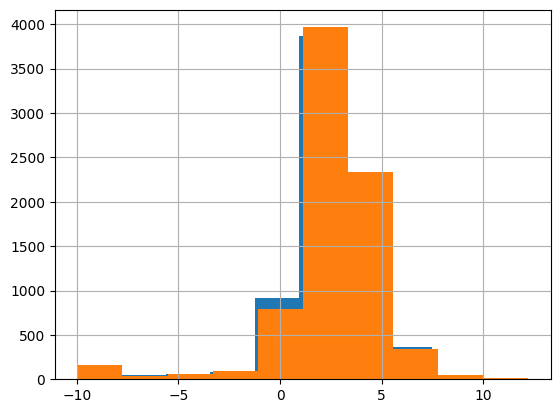

In [ ]:
df_tumor.iloc[:, list(comm_n[1].intersection(comm_t[1]))].mean().hist()
df_normal.iloc[:, list(comm_n[1].intersection(comm_t[1]))].mean().hist()

<Axes: >

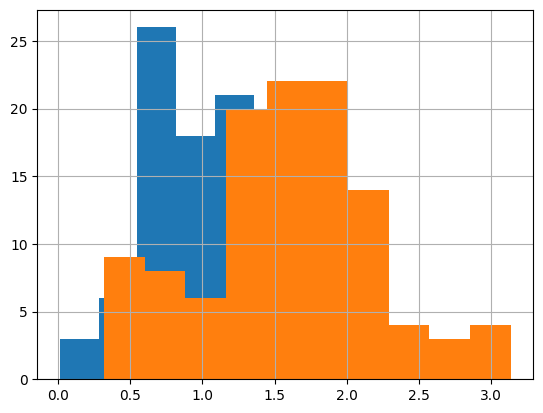

In [ ]:
df_tumor.iloc[:, list(comm_n[2].intersection(comm_t[2]))].mean().hist()
df_normal.iloc[:, list(comm_n[2].intersection(comm_t[2]))].mean().hist()

#Community 0

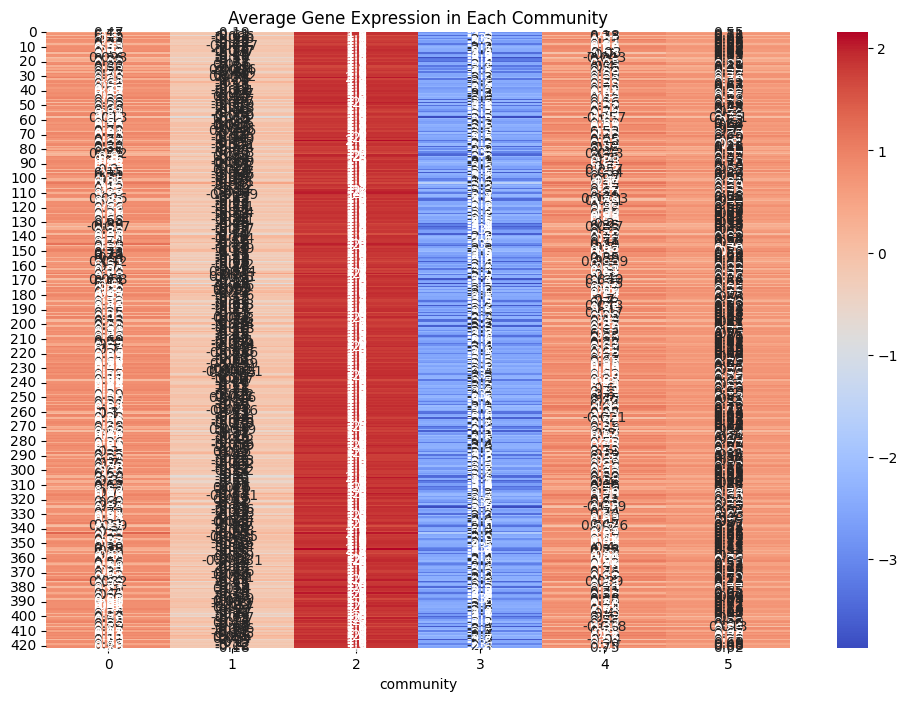

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_norm.groupby('community').mean().T, cmap="coolwarm", annot=True)
plt.title("Average Gene Expression in Each Community")
plt.show()

<Axes: >

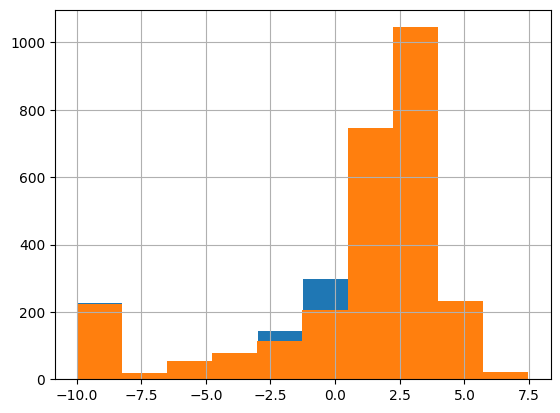

In [ ]:
df_norm[df_norm['community'] == 0].median(axis=1).hist()
df_tum[df_tum['community'] == 0].median(axis=1).hist()

In [ ]:
dist0 = (df_norm[df_norm['community'] == 0] - df_tum[df_tum['community'] == 0].loc[:, :421]).abs()
dist0

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,community
ENSG00000000460.17,4.013910,1.073813,1.652116,0.277238,2.927573,0.239350,0.196025,1.058752,2.105726,1.621234,...,1.354488,1.982749,0.146723,3.896145,0.476014,1.644866,0.702236,0.107981,0.997258,NaN
ENSG00000001167.14,0.049503,0.186691,0.388159,0.384834,0.989698,0.230108,0.212406,0.554241,1.206786,0.496917,...,0.869403,1.208421,0.009628,0.332228,0.744173,0.893640,0.625190,0.167286,0.036803,NaN
ENSG00000001629.10,0.178392,0.963079,0.019139,0.473845,1.374637,0.315884,0.323429,0.842503,0.489803,0.617992,...,0.907171,1.317937,0.880273,1.416945,0.402349,0.266355,1.007365,0.417094,2.152678,NaN
ENSG00000002016.18,0.156974,2.212923,0.205050,1.845072,2.171693,2.030815,0.174177,1.266810,0.676087,0.589154,...,0.098394,0.605013,1.899528,3.213844,1.529282,0.652125,0.956169,1.934236,1.187872,NaN
ENSG00000002822.15,1.781324,0.678498,0.533066,2.797917,1.612718,2.982211,1.039022,0.447933,0.750722,1.585531,...,0.893085,0.756492,1.269221,2.118659,1.127956,0.938075,1.827087,2.756017,0.846212,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285077.2,2.463457,0.908623,7.874674,2.193949,2.991893,2.201274,0.772118,3.210218,1.540363,1.178671,...,2.019304,3.077601,1.438138,7.019019,0.103631,1.464827,2.180621,0.312432,1.898519,NaN
ENSG00000285437.1,0.281020,3.524222,0.144390,5.524132,7.573131,9.994071,0.434617,3.461173,1.804276,1.334544,...,1.503515,3.677150,0.672194,6.930553,5.806840,1.639864,3.424338,4.364402,1.323695,NaN
ENSG00000285480.1,0.293836,6.903279,2.414602,2.012716,0.569506,0.000000,1.059514,0.195612,0.286556,0.440323,...,1.649980,0.394589,1.966167,2.718279,2.065453,0.533342,2.179090,8.665691,0.433372,NaN
ENSG00000286522.2,10.267957,6.281401,9.965496,6.767861,11.709894,13.042891,4.538010,6.523336,9.224243,3.107664,...,3.403710,4.229729,1.332638,18.077119,3.708994,2.653540,9.307833,1.892169,4.523489,NaN


In [ ]:
dist0 = dist0.mean(axis=1)
dist0

ENSG00000000460.17    1.215293
ENSG00000001167.14    0.606077
ENSG00000001629.10    0.645815
ENSG00000002016.18    1.038884
ENSG00000002822.15    1.750134
                        ...   
ENSG00000285077.2     1.719652
ENSG00000285437.1     2.681095
ENSG00000285480.1     3.631658
ENSG00000286522.2     6.582401
ENSG00000287080.2     6.049986
Length: 2743, dtype: float64

<Axes: >

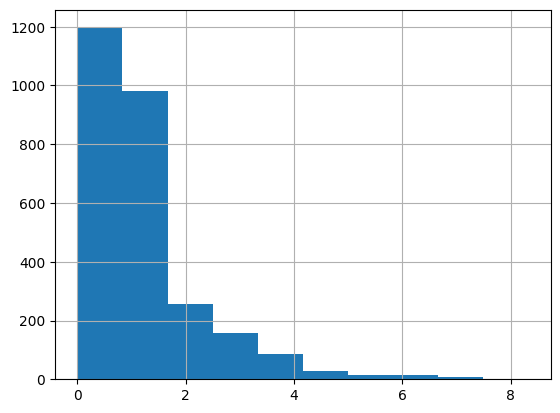

In [ ]:
dist0.hist()

In [ ]:
dist0.mean()

1.2574807268954946

In [ ]:
norm = df_norm[df_norm['community'] == 0].transpose()
norm['tumor'] = 0
norm = norm.drop('community', axis=0)
tum = df_tum[df_tum['community'] == 0].transpose()
tum['tumor'] = 1
tum = tum.drop('community', axis=0)
x = pd.concat([norm, tum], axis=0)
x

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000001461.17,ENSG00000001629.10,ENSG00000001631.16,ENSG00000002834.18,ENSG00000002919.15,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003393.15,...,ENSG00000284873.1,ENSG00000285077.2,ENSG00000285231.1,ENSG00000286019.1,ENSG00000286095.1,ENSG00000286140.1,ENSG00000286219.1,ENSG00000288558.2,ENSG00000288649.1,tumor
0,4.339558,4.542147,3.105628,2.740280,0.131985,5.019929,2.773490,4.297998,2.113367,1.929905,...,-9.965784,-4.563199,-4.921390,-9.965784,-3.766112,-9.965784,-3.052895,0.541118,-9.965784,0
1,2.659377,4.511342,3.073015,3.715849,0.979221,3.659616,2.070973,4.691076,2.572259,2.706597,...,-9.965784,-3.101598,-3.930160,-9.965784,-4.068544,-9.965784,0.819259,0.172872,-9.965784,0
2,2.379344,4.282173,3.236416,3.037470,-0.385714,5.107353,2.616475,4.631337,2.025738,1.702126,...,-9.965784,-9.965784,-9.965784,-9.965784,-4.590745,-9.965784,-3.038599,0.988776,-9.965784,0
3,2.413377,4.582514,3.034920,3.770332,0.859652,3.997238,2.215461,4.722455,2.858558,2.812560,...,-9.965784,-2.812992,-3.990796,-4.365871,-5.102837,-9.965784,0.785006,0.004178,-9.965784,0
4,2.357214,4.474137,2.915999,2.935761,-0.016687,5.222835,2.524365,4.393608,1.620680,1.796432,...,-9.965784,-4.107803,-5.073393,-9.965784,-4.235144,-9.965784,-3.509635,0.527771,-9.965784,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,2.827352,5.458950,2.419377,3.035290,0.414352,4.700318,3.023734,4.595193,2.865760,2.379676,...,-9.965784,-0.989650,-9.965784,-9.965784,-9.965784,-9.965784,-3.507993,0.410775,-9.965784,1
1575,4.919159,4.806401,2.430954,3.947124,0.599794,3.895516,2.618074,4.654476,0.482848,2.783687,...,-9.965784,-2.355498,-2.170719,-9.965784,-9.965784,-9.965784,-0.050353,-0.747342,-9.965784,1
1576,3.948292,3.840856,1.978781,3.069410,-0.070360,5.208958,3.186564,4.803971,3.594190,1.688449,...,-9.965784,-2.268817,-4.857260,-9.965784,-5.947862,-9.965784,-2.519528,-1.083753,-9.965784,1
1577,2.632873,4.549663,1.222743,2.865859,-1.601212,5.881515,3.021355,4.703466,-2.503896,1.629660,...,-9.965784,-3.376320,-4.921390,-9.965784,-9.965784,-9.965784,-4.200250,-0.962126,-9.965784,1


In [ ]:
x_train = x.drop('tumor', axis=1)
y_train = x['tumor'].values

In [ ]:
rf0 = RandomForestRegressor(n_estimators=100, random_state=42)
rf0.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
global_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
less_important0 = global_importances[:20]
most_important0 = global_importances[-20:]

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

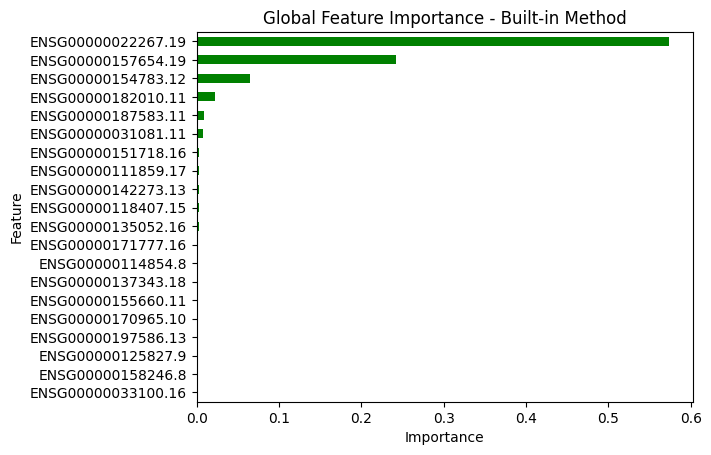

In [ ]:
most_important0.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
global_importances['ENSG00000133703.13']

0.0

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  if g in df_norm[df_norm['community'] == 1].index.values:
    print(g)

ENSG00000146648.19
ENSG00000105976.16
ENSG00000157764.14
ENSG00000121879.6
ENSG00000171094.18
ENSG00000165731.20
ENSG00000047936.11


#Community 1

<Axes: >

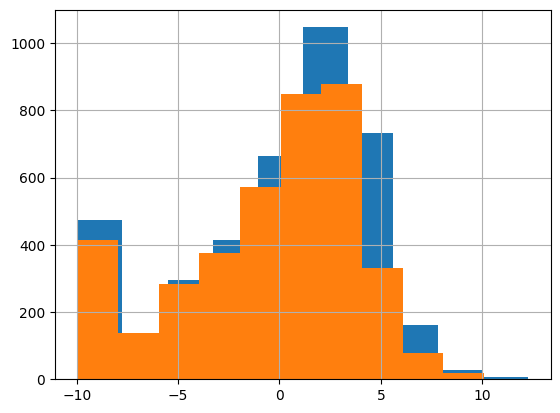

In [ ]:
df_norm[df_norm['community'] == 1].median(axis=1).hist()
df_tum[df_tum['community'] == 1].median(axis=1).hist()

In [ ]:
dist1 = (df_norm[df_norm['community'] == 1] - df_tum[df_tum['community'] == 1].loc[:, :421]).abs()
dist1

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,community
ENSG00000000005.6,4.837943,8.031219,4.738768,1.566037,1.737999,3.632541,0.239488,7.185867,3.717050,3.018772,...,0.829182,1.505615,5.942515,4.678526,6.383704,0.462072,0.373425,8.257388,6.855491,NaN
ENSG00000000938.13,1.732509,0.749829,4.725572,1.650532,2.345824,2.492171,2.112770,0.155193,2.278614,1.411127,...,1.415505,2.398065,4.472521,4.072910,3.712966,1.997338,3.321842,1.331688,1.026914,NaN
ENSG00000000971.16,0.879928,0.933941,3.234735,0.611184,0.492747,0.492653,0.905875,1.225560,2.048506,2.930457,...,1.102960,0.489629,1.691103,1.553545,0.983399,1.008794,1.146866,1.883651,0.038182,NaN
ENSG00000001617.12,0.877336,0.559869,0.529071,1.499174,1.288719,1.180233,0.925913,1.657367,1.106893,0.979558,...,1.537684,1.069046,1.674191,2.834202,2.363953,1.944680,0.874466,2.531695,1.982709,NaN
ENSG00000002330.14,0.352394,0.348953,0.418565,0.786948,0.040347,2.108882,1.138195,0.890916,0.130636,0.930814,...,0.114369,0.949664,3.194680,0.034975,0.600904,0.614640,0.345565,1.279584,1.048410,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000284713.1,0.780358,2.264763,5.432959,0.081018,2.119691,5.305268,1.965396,2.660543,0.121379,0.326620,...,1.957063,1.660504,1.242923,0.840644,7.858603,1.411360,0.182423,2.899659,1.430570,NaN
ENSG00000284718.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
ENSG00000284730.1,1.401468,0.956517,6.283551,2.571835,8.966361,0.982334,4.005564,0.794090,2.349091,0.251947,...,0.304220,2.786456,3.520223,7.624978,3.036089,0.531301,1.595131,2.966366,1.870701,NaN
ENSG00000284873.1,3.981853,0.000000,0.000000,0.000000,0.000000,6.044394,5.551516,0.000000,4.399171,0.000000,...,0.000000,0.016241,4.791814,4.201634,0.000000,0.000000,0.000000,5.112700,5.263034,NaN


In [ ]:
dist1 = dist1.mean(axis=1)
dist1

ENSG00000000005.6     4.000385
ENSG00000000938.13    2.248648
ENSG00000000971.16    1.377729
ENSG00000001617.12    1.265022
ENSG00000002330.14    0.694831
                        ...   
ENSG00000284713.1     2.322466
ENSG00000284718.1     0.131013
ENSG00000284730.1     2.485627
ENSG00000284873.1     2.026511
ENSG00000288642.1     0.000000
Length: 3940, dtype: float64

In [ ]:
dist1.mean()

2.043955838419084

In [ ]:
norm = df_norm[df_norm['community'] == 1].transpose()
norm['tumor'] = 0
norm = norm.drop('community', axis=0)
tum = df_tum[df_tum['community'] == 1].transpose()
tum['tumor'] = 1
tum = tum.drop('community', axis=0)
x = pd.concat([norm, tum], axis=0)
x

,ENSG00000000005.6,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001626.16,ENSG00000001630.17,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,...,ENSG00000282757.4,ENSG00000283039.1,ENSG00000283093.1,ENSG00000283227.1,ENSG00000283516.1,ENSG00000283683.1,ENSG00000284308.1,ENSG00000284395.2,ENSG00000288642.1,tumor
0,-5.127841,4.291780,3.587077,3.684662,2.316754,1.156720,-0.277884,2.689568,5.067673,4.864855,...,-3.177882,-7.559792,-9.965784,-5.828281,-9.965784,-7.356975,0.309409,-1.820616,-9.965784,0
1,-1.934566,4.348551,4.722335,3.390255,2.124857,3.748826,1.580242,2.381865,5.276943,4.467795,...,-0.214575,-9.965784,-9.965784,-9.965784,-3.867752,-5.519528,-2.118414,-3.529489,-9.965784,0
2,-5.227016,4.410660,4.010923,3.905928,1.100843,1.328722,0.680504,2.308623,5.276471,5.548939,...,-4.836501,-9.965784,-9.965784,-4.398969,-9.965784,-9.965784,-3.120294,-4.056491,-9.965784,0
3,-2.344465,4.298284,4.774023,3.393567,1.303810,3.465779,0.948900,1.984261,4.681326,4.067905,...,-0.651768,-9.965784,-9.965784,-9.965784,-2.038599,-2.736004,-4.791857,-2.862496,-9.965784,0
4,-3.578629,4.991272,5.105070,3.827270,1.954382,1.489132,-0.108114,2.550950,5.368699,5.683567,...,-3.180495,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.020926,-5.248793,-9.965784,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,-5.828281,4.568956,2.757237,4.013864,1.944746,1.282440,-0.904278,2.316464,5.350303,5.243646,...,-3.179188,-9.965784,-9.965784,-9.965784,-5.965784,-4.717857,-3.748554,-5.243318,-9.965784,1
1575,-9.965784,3.487654,3.856030,4.175245,5.274038,2.001982,0.229588,2.838468,5.346432,4.677660,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.286304,-0.532825,-4.137965,-9.965784,1
1576,-6.546245,1.855153,3.846664,4.708220,3.621478,-1.614845,-0.188200,3.227525,5.353496,5.031735,...,-5.237864,-9.965784,-9.965784,-5.756331,-9.965784,-5.467533,-5.078259,-5.429731,-9.965784,1
1577,-6.615287,0.986957,3.707955,3.901485,-1.422366,-5.636661,1.157497,3.212616,4.686176,6.137676,...,-6.243318,-9.965784,-9.965784,-0.264131,-9.965784,-9.965784,-1.847881,-9.965784,-9.965784,1


In [ ]:
x_train = x.drop('tumor', axis=1)
y_train = x['tumor'].values

In [ ]:
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
global_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
less_important1 = global_importances[:20]
most_important1 = global_importances[-20:]

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

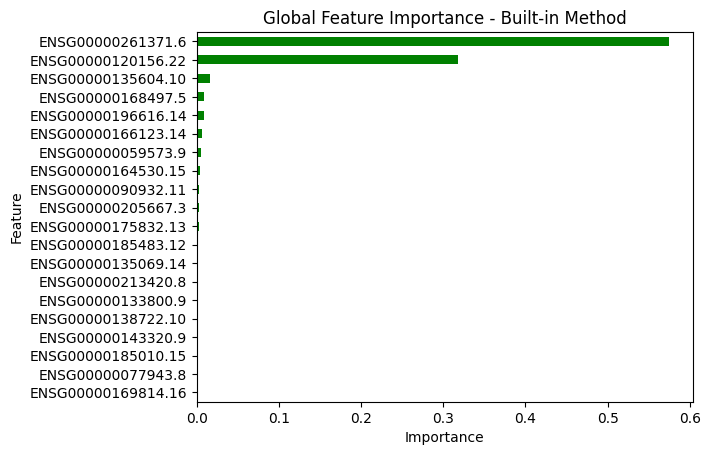

In [ ]:
most_important1.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  if g in x_train.columns.values:
    print(g)

ENSG00000146648.19
ENSG00000105976.16
ENSG00000157764.14
ENSG00000121879.6
ENSG00000171094.18
ENSG00000165731.20
ENSG00000047936.11
ENSG00000141510.18


In [ ]:
n = df_norm[df_norm['community'] == 1].transpose()
t = df_tum[df_tum['community'] == 1].transpose()
t = t.loc[:n.shape[0]]
dist = np.abs(t - n)
ordered_dist = dist.sum(axis=0).sort_values(ascending=False)
ordered_dist

ENSG00000169469.9           3730.695571
ENSG00000170373.8           3667.892224
ENSG00000168484.12          3393.984551
ENSG00000169474.4           3375.777151
ENSG00000186832.9           3371.329455
                               ...     
ENSG00000105371.10             0.000000
ENSG00000178922.17             0.000000
ENSG00000169084.15_PAR_Y       0.000000
ENSG00000124334.17_PAR_Y       0.000000
ENSG00000288642.1              0.000000
Length: 4764, dtype: float64

<Axes: >

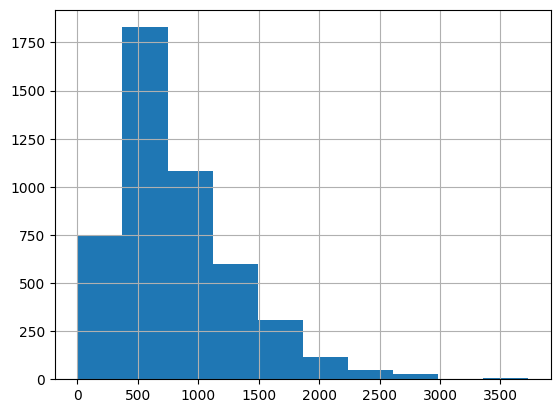

In [ ]:
ordered_dist.hist()

In [ ]:
ordered_dist.mean()

822.9488143921743

In [ ]:
for g in genes:
  if g in ordered_dist.index.values:
    print(g)
    print("normal: ", n[g].median())
    print("tumor: ", t[g].median())

ENSG00000146648.19
normal:  3.920541033702552
tumor:  4.109444137574919
ENSG00000105976.16
normal:  4.5691143282596
tumor:  4.578210272255113
ENSG00000157764.14
normal:  2.562327914727505
tumor:  0.920292784611032
ENSG00000121879.6
normal:  2.2546545067720025
tumor:  1.7167041747660747
ENSG00000171094.18
normal:  -0.7304880300950013
tumor:  -3.0831417533609895
ENSG00000165731.20
normal:  -2.252225928257295
tumor:  -1.9263177842600276
ENSG00000047936.11
normal:  5.52502586218706
tumor:  2.688561248332072
ENSG00000141510.18
normal:  2.07056106707866
tumor:  3.3145126521416355


In [ ]:
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.utils.data import DataLoader
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class GCNEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, edge_index, n_classes):
        self.edge_index = edge_index
        self.n_classes = n_classes
        self.model = None

    def fit(self, X, y, **kwargs):
        # Initialize the GCN model
        self.model = GCN(self.edge_index, features_in=X.shape[1], n_classes=self.n_classes)

        # Convert X and y to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)

        # Define the loss function and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)

        # Train the model
        for epoch in range(kwargs.get('epochs', 250)):
            self.model.train()
            optimizer.zero_grad()
            out = self.model(X_tensor, self.edge_index)
            loss = criterion(out, y_tensor)
            loss.backward()
            optimizer.step()
            if epoch % 10 == 0:
              print("EPOCH {}: LOSS: {}".format(epoch, loss))

    def predict(self, X):
        # Convert X to a PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Make predictions
        self.model.eval()
        with torch.no_grad():
            out = self.model(X_tensor, self.edge_index)
            _, predicted = torch.max(out, 1)

        return predicted.numpy()

    def score(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate accuracy
        return accuracy_score(y, y_pred)

    def set_index(self, edge_index):
      self.edge_index = edge_index

# Define your GCN model class
class GCN(torch.nn.Module):
    def __init__(self, edge_index, features_in, n_classes):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(features_in, 512)
        self.conv2 = GCNConv(512, 256)
        self.conv3 = GCNConv(256, 2)
        self.classifier = Linear(2, n_classes)
        self.edge_index = edge_index

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()

        out = self.classifier(h)

        return out


In [ ]:
x_train = x_train.transpose()
x_train['expressed'] = 1 if
x_train

,ENSG00000000005.6,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001626.16,ENSG00000001630.17,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,...,ENSG00000282608.2,ENSG00000282757.4,ENSG00000283039.1,ENSG00000283093.1,ENSG00000283227.1,ENSG00000283516.1,ENSG00000283683.1,ENSG00000284308.1,ENSG00000284395.2,ENSG00000288642.1
0,-5.127841,4.291780,3.587077,3.684662,2.316754,1.156720,-0.277884,2.689568,5.067673,4.864855,...,-0.787368,-3.177882,-7.559792,-9.965784,-5.828281,-9.965784,-7.356975,0.309409,-1.820616,-9.965784
1,-1.934566,4.348551,4.722335,3.390255,2.124857,3.748826,1.580242,2.381865,5.276943,4.467795,...,0.648650,-0.214575,-9.965784,-9.965784,-9.965784,-3.867752,-5.519528,-2.118414,-3.529489,-9.965784
2,-5.227016,4.410660,4.010923,3.905928,1.100843,1.328722,0.680504,2.308623,5.276471,5.548939,...,0.400429,-4.836501,-9.965784,-9.965784,-4.398969,-9.965784,-9.965784,-3.120294,-4.056491,-9.965784
3,-2.344465,4.298284,4.774023,3.393567,1.303810,3.465779,0.948900,1.984261,4.681326,4.067905,...,0.406754,-0.651768,-9.965784,-9.965784,-9.965784,-2.038599,-2.736004,-4.791857,-2.862496,-9.965784
4,-3.578629,4.991272,5.105070,3.827270,1.954382,1.489132,-0.108114,2.550950,5.368699,5.683567,...,0.299831,-3.180495,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.020926,-5.248793,-9.965784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,-5.828281,4.568956,2.757237,4.013864,1.944746,1.282440,-0.904278,2.316464,5.350303,5.243646,...,0.813771,-3.179188,-9.965784,-9.965784,-9.965784,-5.965784,-4.717857,-3.748554,-5.243318,-9.965784
1575,-9.965784,3.487654,3.856030,4.175245,5.274038,2.001982,0.229588,2.838468,5.346432,4.677660,...,0.356595,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.286304,-0.532825,-4.137965,-9.965784
1576,-6.546245,1.855153,3.846664,4.708220,3.621478,-1.614845,-0.188200,3.227525,5.353496,5.031735,...,1.932023,-5.237864,-9.965784,-9.965784,-5.756331,-9.965784,-5.467533,-5.078259,-5.429731,-9.965784
1577,-6.615287,0.986957,3.707955,3.901485,-1.422366,-5.636661,1.157497,3.212616,4.686176,6.137676,...,-1.046623,-6.243318,-9.965784,-9.965784,-0.264131,-9.965784,-9.965784,-1.847881,-9.965784,-9.965784


In [ ]:
from sklearn.feature_selection import RFE

estimator = GCNEstimator(edge_index=edge_index, n_classes=2)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

#Community 2

<Axes: >

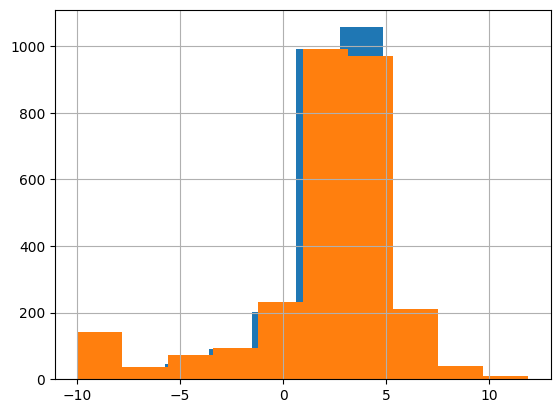

In [ ]:
df_norm[df_norm['community'] == 2].median(axis=1).hist()
df_tum[df_tum['community'] == 2].median(axis=1).hist()

In [ ]:
dist2 = (df_norm[df_norm['community'] == 2] - df_tum[df_tum['community'] == 2].loc[:, :421]).abs()
dist2

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,community
ENSG00000001497.18,0.203798,1.256812,1.297446,0.344148,0.593874,0.631394,1.249862,0.435414,0.771849,1.483512,...,0.120388,0.916664,0.231030,1.615381,0.288459,0.069856,0.081717,0.252893,0.383674,NaN
ENSG00000003509.16,0.037607,0.615383,2.252054,1.222855,0.618924,0.394134,0.337023,1.285182,0.426171,0.338993,...,0.520374,0.502347,2.257531,1.814885,1.105101,0.414435,0.117237,0.815226,0.579805,NaN
ENSG00000003756.17,0.928509,1.845798,0.257038,1.758036,0.898217,2.250367,1.102749,1.623923,0.011456,1.838038,...,0.231416,0.229552,2.411751,1.595328,1.743888,0.835055,0.409171,1.703552,0.688876,NaN
ENSG00000004142.12,0.678346,1.798006,0.894545,1.550067,0.337796,1.985421,1.456947,1.111865,0.587978,1.341048,...,0.567534,0.451751,1.951835,0.220185,1.371071,0.877745,0.428343,1.630897,1.241123,NaN
ENSG00000004455.17,0.721661,0.302168,0.587414,0.469690,1.018147,1.369378,0.912325,0.115286,0.480332,0.625311,...,0.146467,0.641231,0.311818,0.898421,0.448410,0.140951,0.638389,0.225903,0.108015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286228.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
ENSG00000286920.2,4.862947,0.000000,0.000000,0.000000,5.566815,5.951868,5.944858,5.719731,5.281698,0.000000,...,5.510962,0.000000,5.683696,8.411935,0.000000,6.033423,4.986411,0.000000,0.000000,NaN
ENSG00000288607.1,0.000000,0.000000,0.000000,0.000000,0.000000,5.485427,0.000000,0.000000,0.000000,5.116864,...,0.000000,0.000000,6.715619,0.000000,0.000000,0.000000,0.000000,0.000000,7.846117,NaN
ENSG00000288616.1,0.000000,4.145677,0.000000,0.000000,5.672425,6.059615,6.780048,4.292782,0.000000,4.161888,...,7.153805,6.155830,0.000000,0.000000,5.251719,1.812456,5.129283,6.849249,0.000000,NaN


In [ ]:
dist2 = dist2.mean(axis=1)
dist2

ENSG00000001497.18    0.532371
ENSG00000003509.16    0.612424
ENSG00000003756.17    1.094236
ENSG00000004142.12    1.155021
ENSG00000004455.17    0.582772
                        ...   
ENSG00000286228.1     0.047826
ENSG00000286920.2     2.526602
ENSG00000288607.1     2.628369
ENSG00000288616.1     2.715986
ENSG00000288631.1     2.242188
Length: 2806, dtype: float64

In [ ]:
dist2.mean()

1.0183653419875016

In [ ]:
norm = df_norm[df_norm['community'] == 2].transpose()
norm['tumor'] = 0
norm = norm.drop('community', axis=0)
tum = df_tum[df_tum['community'] == 2].transpose()
tum['tumor'] = 1
tum = tum.drop('community', axis=0)
x = pd.concat([norm, tum], axis=0)
x

,ENSG00000001460.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000002587.10,ENSG00000002746.15,ENSG00000003096.14,ENSG00000003249.15,ENSG00000003989.18,ENSG00000004399.13,ENSG00000004776.13,...,ENSG00000284733.1,ENSG00000284741.1,ENSG00000284791.2,ENSG00000284824.1,ENSG00000285620.1,ENSG00000285950.1,ENSG00000285975.1,ENSG00000286237.1,ENSG00000288611.1,tumor
0,2.103028,4.131631,3.839123,2.067122,-5.608232,0.823179,1.166587,3.907525,4.845942,2.574828,...,-9.965784,-9.965784,-1.254978,-9.965784,-9.965784,-9.965784,-9.965784,-7.405069,-3.402016,0
1,0.391108,3.784263,2.610889,0.614097,-4.775960,0.056029,-0.833413,4.574695,3.870177,-1.213571,...,-9.965784,-9.965784,0.565792,-9.965784,-9.965784,-9.965784,-9.965784,-5.035047,-7.058894,0
2,0.776188,4.385231,3.262899,-0.693388,-8.078259,-1.475535,0.830174,2.845992,5.081540,3.086597,...,-9.965784,-9.965784,-1.531573,-9.965784,-9.965784,-9.965784,-9.965784,-7.002310,-3.773985,0
3,0.295488,4.225738,2.207987,-0.541828,-3.083141,-1.479553,-0.486206,4.829083,4.046072,-1.224317,...,-9.965784,-9.965784,0.017352,-9.965784,-9.965784,-9.965784,-9.965784,-6.587273,-5.665661,0
4,0.805292,3.853996,3.700362,0.090447,-3.925769,-0.288241,1.112233,2.570147,5.118538,3.467071,...,-9.965784,-9.965784,-1.476338,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-6.310432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0.396488,3.498404,3.178189,-0.960721,-6.232430,-3.388355,1.311794,0.638120,4.346333,0.668028,...,-9.965784,-9.965784,-3.051698,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-4.080698,1
1575,1.069427,1.823301,4.130791,3.030725,-2.311864,2.568786,0.673918,0.826843,2.041348,-4.389867,...,-5.158429,-4.662004,-4.698998,-9.965784,-9.965784,-9.965784,-9.965784,-4.848921,1.986192,1
1576,-0.664745,3.718647,2.519089,0.051720,-2.239226,-1.505533,3.623879,4.372583,3.295503,-2.210897,...,-9.965784,-9.965784,-5.580353,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-7.828281,1
1577,0.128557,-1.056191,5.192537,0.660107,-3.046921,-1.599899,0.639047,-2.715012,3.522545,-2.729292,...,-9.965784,-9.965784,-6.573467,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-6.168771,1


In [ ]:
x_train = x.drop('tumor', axis=1)
y_train = x['tumor'].values

In [ ]:
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
global_importances = pd.Series(rf2.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
less_important2 = global_importances[:20]
most_important2 = global_importances[-20:]

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

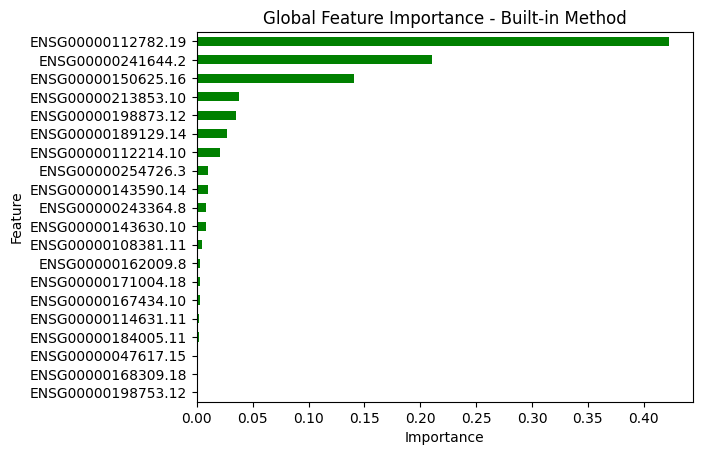

In [ ]:
most_important2.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  if g in x_train.columns.values:
    print(g)

#Community 3

<Axes: >

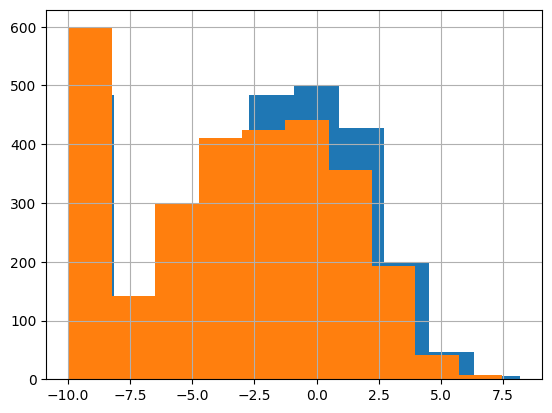

In [ ]:
df_norm[df_norm['community'] == 3].median(axis=1).hist()
df_tum[df_tum['community'] == 3].median(axis=1).hist()

In [ ]:
dist3 = (df_norm[df_norm['community'] == 3] - df_tum[df_tum['community'] == 3].loc[:, :421]).abs()
dist3

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,community
ENSG00000002746.15,3.118992,0.972063,3.033721,1.032639,2.177215,1.004047,3.242728,3.550942,0.863221,0.482639,...,2.831486,1.848897,2.160177,2.835033,2.818367,3.179378,0.647159,3.096317,1.961844,NaN
ENSG00000003249.15,1.355720,0.718128,0.126626,3.636571,0.831538,2.841547,3.496635,3.002113,1.723902,4.922285,...,0.886404,1.005065,0.601079,3.743926,0.859519,2.121183,0.502792,3.174770,1.666636,NaN
ENSG00000004660.15,0.129641,0.928805,1.150807,0.099542,0.058860,0.740881,0.183115,0.655700,0.353692,0.631424,...,0.069525,0.816751,0.736334,0.600279,0.766706,0.004252,0.409340,0.102313,0.431300,NaN
ENSG00000004948.16,2.550747,2.437634,0.686677,2.370563,1.515218,1.727413,3.219169,0.012662,1.366150,7.719047,...,3.831406,0.766734,0.343484,0.340624,1.222392,0.170511,3.490498,1.834657,1.044200,NaN
ENSG00000005059.16,2.140240,0.711618,1.486696,0.318263,0.701343,0.252685,0.522642,0.296015,1.060837,0.097221,...,0.542840,0.834599,0.313094,0.548252,1.306870,0.199347,2.201841,0.761105,0.601371,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000284791.2,4.113871,4.015877,8.434211,3.473757,1.052319,3.763939,2.552812,1.716179,2.943208,7.317604,...,1.943180,5.376828,3.935590,3.154602,7.632450,5.075056,1.157754,3.968082,3.099101,NaN
ENSG00000284824.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
ENSG00000285620.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
ENSG00000286237.1,2.560715,2.445311,2.963474,3.378512,5.778734,2.887525,0.436099,3.572890,2.432959,0.447459,...,4.232661,0.889442,2.655352,2.608809,2.700440,0.421640,1.929611,0.807355,2.827819,NaN


In [ ]:
dist3 = dist3.mean(axis=1)
dist3

ENSG00000002746.15    2.010391
ENSG00000003249.15    2.272343
ENSG00000004660.15    0.734587
ENSG00000004948.16    1.753306
ENSG00000005059.16    0.686873
                        ...   
ENSG00000284791.2     4.106133
ENSG00000284824.1     0.058477
ENSG00000285620.1     0.000000
ENSG00000286237.1     2.252383
ENSG00000288611.1     3.253080
Length: 2916, dtype: float64

In [ ]:
dist3.mean()

2.155327870738784

In [ ]:
norm = df_norm[df_norm['community'] == 3].transpose()
norm['tumor'] = 0
norm = norm.drop('community', axis=0)
tum = df_tum[df_tum['community'] == 3].transpose()
tum['tumor'] = 1
tum = tum.drop('community', axis=0)
x = pd.concat([norm, tum], axis=0)
x

,ENSG00000000457.14,ENSG00000000460.17,ENSG00000001167.14,ENSG00000001497.18,ENSG00000002016.18,ENSG00000002822.15,ENSG00000003509.16,ENSG00000003756.17,ENSG00000004142.12,ENSG00000004455.17,...,ENSG00000286053.2,ENSG00000286137.1,ENSG00000286228.1,ENSG00000286522.2,ENSG00000286920.2,ENSG00000287080.2,ENSG00000288607.1,ENSG00000288616.1,ENSG00000288631.1,tumor
0,1.132050,-1.118414,2.736194,1.917317,1.259001,-3.750494,1.352420,3.095064,4.722553,3.214902,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,0
1,1.998593,0.231924,3.329023,1.378734,2.155231,-1.884700,2.573520,4.034515,4.083784,3.396406,...,-4.643856,-9.965784,-9.965784,2.992279,-9.965784,1.762306,-9.965784,-5.820107,-9.965784,0
2,1.180339,-0.991370,2.780226,1.527871,0.569199,-3.038599,1.004609,2.316870,4.744053,3.295591,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,0
3,1.694212,0.110898,3.102524,1.243121,2.701460,-0.991943,2.593354,3.851359,4.039472,3.436682,...,-9.965784,-9.965784,-9.965784,3.790762,-9.965784,2.546709,-9.965784,-9.965784,-4.348133,0
4,1.192005,-0.742024,2.856946,1.603929,0.721416,-1.901311,1.904889,2.691690,4.703488,3.262208,...,-9.965784,-9.965784,-9.965784,-4.356975,-9.965784,-4.287712,-9.965784,-9.965784,-9.965784,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1.390503,0.803310,2.920122,2.433894,1.426479,-2.556393,2.275394,3.203154,5.303543,4.507611,...,-4.807932,-9.965784,-9.965784,-2.790859,-9.965784,-2.306145,-9.965784,-9.965784,-9.965784,1
1575,2.202700,1.007985,3.057883,2.324494,1.916400,-1.877791,3.052294,3.598580,5.334879,3.952436,...,-9.965784,-9.965784,-9.965784,7.921586,-9.965784,7.122767,-9.965784,-9.965784,-9.965784,1
1576,2.528996,0.847356,3.499068,1.654298,1.608809,-3.611755,2.247745,3.047172,5.874249,4.386756,...,-9.965784,-9.965784,-9.965784,-2.831358,-5.310432,-5.044538,-9.965784,-9.965784,-9.965784,1
1577,0.432425,0.505078,2.786805,2.014927,0.059632,-2.603841,0.999856,2.220051,5.911761,4.005409,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,1


In [ ]:
x_train = x.drop('tumor', axis=1)
y_train = x['tumor'].values

In [ ]:
rf3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf3.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
global_importances = pd.Series(rf3.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
less_important3 = global_importances[:20]
most_important3 = global_importances[-20:]

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

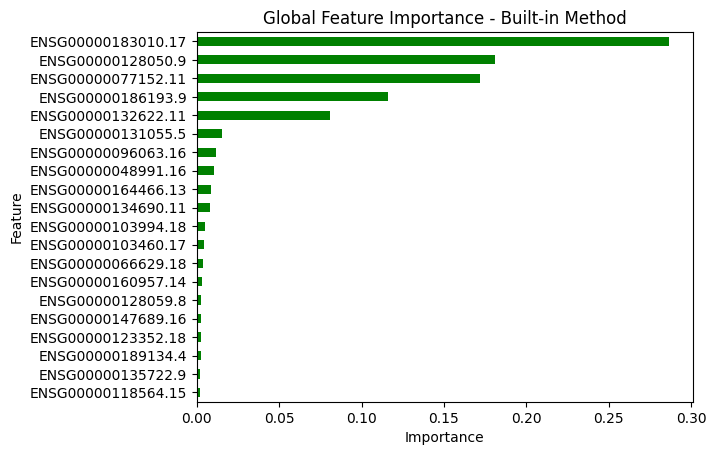

In [ ]:
most_important3.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in genes:
  if g in x_train.columns.values:
    print(g)

#Community 4

<Axes: >

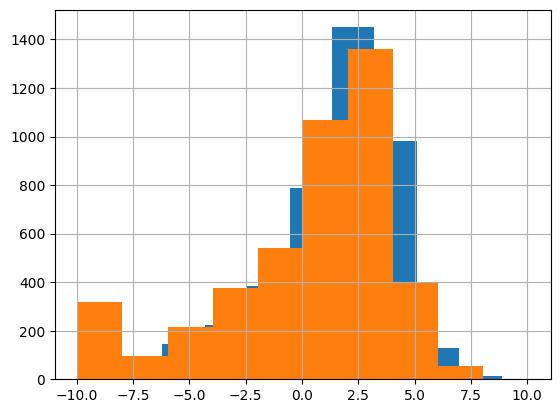

In [ ]:
df_norm[df_norm['community'] == 4].median(axis=1).hist()
df_tum[df_tum['community'] ==4].median(axis=1).hist()

In [ ]:
dist4 = (df_norm[df_norm['community'] == 4] - df_tum[df_tum['community'] == 4].loc[:, :421]).abs()
dist4

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,community
ENSG00000000003.15,0.852818,0.904172,1.035292,1.611137,1.811789,1.686476,1.295214,0.993984,1.761505,2.471816,...,0.883402,1.549638,1.338184,0.062032,1.805644,0.934962,2.239167,1.494014,0.363766,NaN
ENSG00000000457.14,0.470216,1.277964,0.737263,0.587662,1.776418,0.182075,0.231057,0.745026,0.787853,0.880520,...,0.488871,0.964314,1.105095,2.247438,1.585548,0.183689,0.585507,1.157736,0.478095,NaN
ENSG00000001460.18,0.285691,1.142573,0.943915,0.754469,0.151224,0.077192,0.347462,0.061965,0.198627,0.193043,...,0.133639,1.008057,0.708399,1.218481,0.752990,0.189230,0.387075,0.602873,0.519169,NaN
ENSG00000001631.16,1.063245,1.682440,0.822409,1.705457,1.587199,0.798331,1.007305,1.434668,0.128726,1.059643,...,0.234825,0.744129,0.682274,1.804592,1.040911,0.311675,1.108320,1.106469,1.677455,NaN
ENSG00000002834.18,0.611550,1.860413,0.086095,1.544633,1.162390,0.752837,0.024270,0.559442,0.299693,1.584368,...,0.805312,0.883394,0.860422,0.949313,1.336622,0.171990,0.358664,0.805215,0.039044,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286095.1,1.013806,5.897240,5.375039,0.282730,5.730640,5.296457,6.375039,0.787306,1.801454,0.439435,...,7.154818,1.534174,7.157852,4.439623,1.481518,6.478972,4.940167,0.958381,0.877865,NaN
ENSG00000286140.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
ENSG00000286219.1,1.008405,6.129692,1.634404,4.812976,4.929174,3.665691,0.986557,5.259240,2.582765,6.232021,...,0.621219,0.470917,1.970552,5.128235,5.853701,0.919435,2.100029,6.178476,0.894035,NaN
ENSG00000288558.2,2.114156,0.972995,1.953996,1.024811,1.194576,0.246573,1.380105,0.202144,0.739467,0.305723,...,0.993800,0.392795,0.706573,2.062750,1.285848,1.229971,1.222453,1.555426,2.101865,NaN


In [ ]:
dist4 = dist4.mean(axis=1)
dist4

ENSG00000000003.15    1.255159
ENSG00000000457.14    0.703244
ENSG00000001460.18    0.651673
ENSG00000001631.16    0.749849
ENSG00000002834.18    0.854148
                        ...   
ENSG00000286095.1     3.206058
ENSG00000286140.1     0.040974
ENSG00000286219.1     3.216499
ENSG00000288558.2     1.077234
ENSG00000288649.1     0.000000
Length: 4429, dtype: float64

In [ ]:
dist4.mean()

1.4116919799446452

#Community 5

<Axes: >

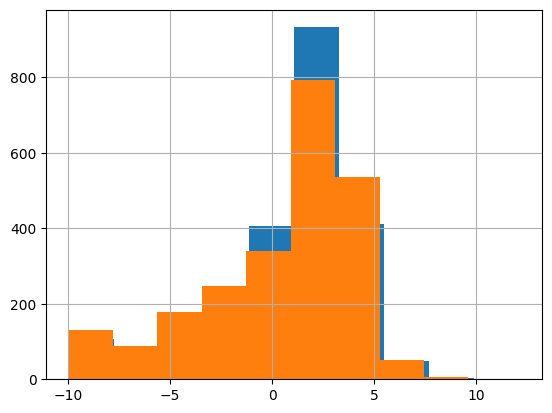

In [ ]:
df_norm[df_norm['community'] == 5].median(axis=1).hist()
df_tum[df_tum['community'] == 5].median(axis=1).hist()

In [ ]:
dist5 = (df_norm[df_norm['community'] == 5] - df_tum[df_tum['community'] == 5].loc[:, :421]).abs()
dist5

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,community
ENSG00000000419.13,0.630697,0.993787,0.593863,0.457260,0.057618,1.078902,0.228566,0.250254,0.738041,1.257264,...,0.074588,0.100737,0.913268,1.012387,0.199003,0.019541,0.261308,0.599475,0.107195,NaN
ENSG00000001036.14,0.013312,0.465964,0.892484,0.943587,0.094100,1.726215,0.604950,0.945419,1.055852,2.227862,...,1.246182,0.962304,0.500069,0.876890,0.212979,0.305801,1.553024,0.409109,0.516885,NaN
ENSG00000001084.13,0.652793,1.175896,4.633533,0.086331,0.061401,0.037783,1.207671,1.258264,3.109464,1.126650,...,2.975094,4.982412,1.914900,3.466197,0.702242,3.391491,0.048009,0.934230,1.357834,NaN
ENSG00000001461.17,0.706019,1.511811,1.631965,1.513920,0.287832,0.607128,0.484106,0.086149,1.007843,0.950558,...,0.327750,0.845783,1.153864,0.171959,2.697061,0.839506,0.690171,0.611074,0.994870,NaN
ENSG00000001561.7,1.967585,2.819680,7.249827,0.678991,0.038912,0.735048,1.886281,1.053500,0.177182,1.296687,...,0.081264,1.511963,3.531703,1.471218,7.012362,2.379811,0.669849,2.138787,2.837183,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000280071.4,0.102520,2.248128,0.164612,0.291451,0.868727,0.521503,2.783007,1.864815,1.643753,1.059311,...,0.332131,0.256871,2.088113,0.152003,1.410799,0.651820,0.663849,0.799672,2.333605,NaN
ENSG00000281991.2,3.201634,5.100137,3.744161,1.660370,6.074677,4.510962,0.460226,0.000000,0.113956,5.112700,...,2.259494,0.591720,0.000000,0.000000,0.000000,2.398128,2.107130,5.539159,1.840522,NaN
ENSG00000283093.1,0.000000,0.000000,0.000000,0.000000,4.161888,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
ENSG00000283324.1,1.640270,0.000000,4.137504,0.000000,4.542258,4.916477,0.000000,5.661065,4.944858,0.000000,...,2.476695,0.985019,0.000000,0.000000,0.000000,4.548437,0.000000,0.000000,4.837943,NaN


In [ ]:
dist5 = dist5.mean(axis=1)
dist5

ENSG00000000419.13    0.651429
ENSG00000001036.14    0.631935
ENSG00000001084.13    1.860799
ENSG00000001461.17    0.764575
ENSG00000001561.7     1.509745
                        ...   
ENSG00000280071.4     1.297480
ENSG00000281991.2     2.803147
ENSG00000283093.1     0.064275
ENSG00000283324.1     2.733997
ENSG00000284308.1     1.339598
Length: 2368, dtype: float64

In [ ]:
dist5.mean()

1.5351593892985342